9423.815323030976
25321.583011776813
71498.2780946286
4.9
Logistic Regression Accuracy: 0.8333333333333334
0
1
0
5
0.8333333333333334
Accuracy: 0.5052083333333334
54
31
21
41
0.6462585034013606
0.875
0
1
0
7
0.875
Feature: outlook, Information Gain: 0.2467
Feature: temp, Information Gain: 0.0292
Feature: humidity, Information Gain: 0.1518
Feature: wind, Information Gain: 0.0481
Accuracy: 1.00
1 0 0 2
1.0
Predictions: [1, 0, 0, 1, 0, 0]
Accuracy: 0.3333333333333333
0
0
4
2
0.3333333333333333
Original data shape: (14, 5)
Transformed data shape: (14, 2)
Eigenvalues: [17.72778608  0.75207765  0.56455197  0.25996934  0.16264793]
Principal components:
[[-0.99333695 -0.05833223]
 [-0.00625889 -0.81081696]
 [ 0.1127664  -0.51332595]
 [-0.02117184  0.268104  ]
 [-0.00883338 -0.06156241]]
Accuracy: 0.577922077922078
60 20 10 28
accuracy is: 0.7457627118644068
Final weights (w1, w2): 1 1
Final bias: -1
Input: [-1, 1] Predicted Output: -1
Input: [-1, -1] Predicted Output: -1

Cluster 1 data points

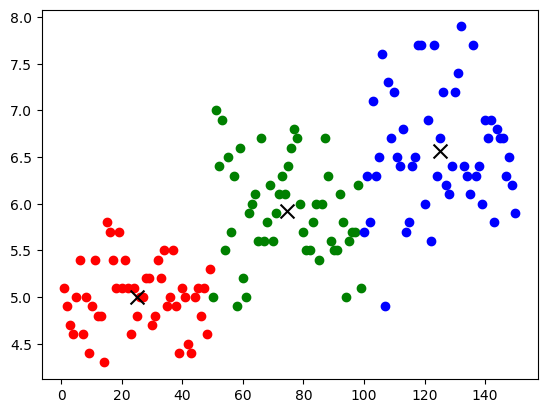

<class 'NameError'>: name 'features' is not defined

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
data = pd.read_csv('Salary.csv')
data.head()
data['Salary'] = data['Salary'].str.replace(',', '').astype(int)
X = data['Year of Experience'].values

y = data['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def LinearRegression(X_train,y_train):
    n=0
    d=0 
    m = 0
    c = 0
    for i in range (X_train.shape[0]):
        
        n = n+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
        d = d+((X_train[i]-X_train.mean())**2)
    
    m = n/d
    c = y_train.mean()-(m*X_train.mean())
    
    return m,c

def predict(m,c,X_test):
    y=m*X_test+c
    return y
m,c=LinearRegression(X_train,y_train)
print(m)
print(c)
print(predict(m,c,X_test[1]))
print(X_test[1])



import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

data = pd.read_csv('PatientDetails_Classification.csv')
#data = pd.read_csv('diabetes.csv')
data=data.drop('Patient Name',axis=1)
X = data.drop(columns='TARGET').values
#X = data.drop(columns='Outcome').values
y = data['TARGET'].values
#y = data['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

class LogisticRegression:

    def __init__(self, lr=0.001, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.w) + self.b
            predictions = self.sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
            
            
    def predict(self, X):
        linear_pred = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(linear_pred)
        class_pred = [1 if y > 0.5 else 0 for y in y_pred]
        return class_pred


scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model = LogisticRegression(lr=0.001, n_iters=10000)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", accuracy)

cm=confusion_matrix(y_test,predictions)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print(tp)
print(fp)
print(fn)
print(tn)

accuracy=(tp+tn)/(tp+fp+tn+fn)
print(accuracy)


import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('diabetes.csv')
data.head()
X = data.drop(columns='Outcome').values
y = data['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def knn_predict(X_train, y_train, X_test, k):
    pred = []

    for test_point in X_test:
        distances = [euclidean_distance(train_point, test_point) for train_point in X_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        
        # Use majority voting to determine the predicted label
        mejvoting = Counter(nearest_labels).most_common()[0][0] ##(0,3),(1,2)
        pred.append(mejvoting)
    
    return np.array(pred)


# Calculate accuracy
y_pred=knn_predict(X_train, y_train, X_test, k=7)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print(tp)
print(fp)
print(fn)
print(tn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print(accuracy)

import numpy as np
import pandas as pd

class SVM:
    def __init__(self, learning_rate=0.01,n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.w)
                else:
                    self.w -= self.lr * (2*self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]


    def predict(self, X):
        prediction = np.dot(X, self.w) + self.b
        return np.sign(prediction).astype(int)
data = pd.read_csv('PatientDetails_Classification.csv')
data=data.drop('Patient Name',axis=1)
X = data.drop(columns='TARGET').values
y = data['TARGET'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print(accuracy)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,predictions) 
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print(tp)
print(fp)
print(fn)
print(tn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print(accuracy)



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv("play_tennis.csv")
data = data.drop('day',axis=1)
X = data.drop(columns=['play'])
y = data['play']
data['play'] = data['play'].map({'No': 0, 'Yes': 1})

data.head(15)

def entropy(y):
    value_counts = y.value_counts()
    probabilities = value_counts / len(y)
    entropy_value = -np.sum(probabilities * np.log2(probabilities.replace(0, 1)))
    return entropy_value
entropy(y)

def information_gain(y, feature):

    total_entropy = entropy(y)
    
    unique_values = feature.unique()
    weighted_entropies = 0

    for value in unique_values:
        subset_y = y[feature == value]
        weighted_entropies += (len(subset_y) / len(y)) * entropy(subset_y)

    return total_entropy - weighted_entropies

for column in data.columns:
    if column != 'play':
        feature = data[column]
        ig = information_gain(y, feature)
        print(f"Feature: {column}, Information Gain: {ig:.4f}")

class Node:
    def __init__(self, feature=None, value=None, entropy=None, information_gain=None, left=None, right=None):
        self.feature = feature
        self.value = value
        self.entropy = entropy
        self.information_gain = information_gain
        self.left = left
        self.right = right

def build_decision_tree(X, y):
    if entropy(y) == 0:
        # If all instances have the same class, create a leaf node
        return Node(value=y.iloc[0])

    if X.empty:
        # If no features left, create a leaf node with the majority class
        return Node(value=y.value_counts().idxmax())

    # Find the best feature to split on
    best_feature = None
    max_info_gain = 0

    for feature_name in X.columns:
        current_info_gain = information_gain(y, X[feature_name])
        if current_info_gain > max_info_gain:
            max_info_gain = current_info_gain
            best_feature = feature_name

    # Create a node with the best feature
    node = Node(feature=best_feature, entropy=entropy(y), information_gain=max_info_gain, value={})

    # Recursively build the left and right subtrees
    unique_values = X[best_feature].unique()
    for value in unique_values:
        subset_X = X[X[best_feature] == value].drop(columns=[best_feature])
        subset_y = y[X[best_feature] == value]
        child_node = build_decision_tree(subset_X, subset_y)

        if node.value is None:
            node.value = {value: child_node}
        else:
            node.value[value] = child_node

    return node

decision_tree = build_decision_tree(X, y)


def predict(node, instance):
    if node.feature is None:
        return node.value
    else:
        value = instance[node.feature]
        if value in node.value:
            return predict(node.value[value], instance)
        else:
            return node.value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = build_decision_tree(X_train, y_train)
y_pred = [predict(decision_tree, instance) for _, instance in X_test.iterrows()]

accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score:.2f}")

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print (tp,fp,fn,tn)
acc=(tp+tn)/(tp+tn+fp+fn)
print (acc)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}

    def fit(self, X, y):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        for c in unique_classes:
            # Calculate class probabilities
            self.class_probs[c] = np.sum(y == c) / num_samples

            # Calculate feature probabilities for each class
            features_given_class = X[y == c]
            self.feature_probs[c] = np.sum(features_given_class, axis=0) / np.sum(y == c)

    def predict(self, X):
        predictions = []

        for sample in X:
            class_scores = {}

            for c, class_prob in self.class_probs.items():
                # Calculate the probability of the sample belonging to each class
                feature_probs_given_class = self.feature_probs[c]
                log_prob = np.sum(np.log(sample * feature_probs_given_class ))
                class_scores[c] = np.log(class_prob) + log_prob

            # Predict the class with the highest probability
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)

        return predictions

data = pd.read_csv("PatientDetails_Classification.csv")

# Convert categorical features to numerical values using label encoding
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
data=data.drop('Patient Name',axis=1)
X = data.drop('TARGET', axis=1).values
y = data['TARGET'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Predictions:", predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print(tp)
print(fp)
print(fn)
print(tn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print(accuracy)

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def pca(X, num_components):

    cov_matrix = np.cov(X, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the standardized data onto the principal components
    transformed_data = np.dot(X, principal_components)

    return transformed_data, eigenvalues, principal_components

data = pd.read_csv("play_tennis.csv")

# Convert categorical features to numerical values using label encoding
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop('play', axis=1).values
y = data['play'].values
# Apply PCA
num_components = 2
transformed_data, eigenvalues, principal_components = pca(X, num_components)

print("Original data shape:", X.shape)
print("Transformed data shape:", transformed_data.shape)
print("Eigenvalues:", eigenvalues)
print("Principal components:")
print(principal_components)

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=100, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth,min_samples_split=self.min_samples_split)
            X_sample, y_sample = self.bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def bootstrap_samples(self, X, y):
    
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        X_bootstrapped = X.reset_index(drop=True).iloc[idxs]
        y_bootstrapped = y.reset_index(drop=True).iloc[idxs]
        return X_bootstrapped, y_bootstrapped

    

    def most_common_label(self, y):
        #counter = Counter(y)
        most_common = Counter(y).most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self.most_common_label(pred) for pred in tree_preds])
        return predictions

df = pd.read_csv('diabetes.csv')

X = df.drop(columns=['Outcome'])

y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

clf = RandomForest()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print (tp,fp,fn,tn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print("accuracy is:",accuracy)

import numpy as np

weight_1 = 0
weight_2 = 0
bias = 0
learning_rate = 1

def activation(yin):
    if yin > 0:
        return 1
    elif yin == 0:
        return 0
    else:
        return -1
        
epochs = 100

input_data = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
targets = np.array([1, -1, -1, -1])

for epoch in range(epochs):
    for i in range(len(input_data)):
        yin = bias + weight_1 * input_data[i][0] + weight_2 * input_data[i][1]
        y = activation(yin)
        if y != targets[i]:
            weight_1 += learning_rate * targets[i] * input_data[i][0]
            weight_2 += learning_rate * targets[i] * input_data[i][1]
            bias += learning_rate * targets[i]

print("Final weights (w1, w2):", weight_1, weight_2)
print("Final bias:", bias)

def predict_output(x1, x2):
    yin = bias + weight_1 * x1 + weight_2 * x2
    return activation(yin)

# Test the trained perceptron
test_data = np.array([[-1, 1], [-1, -1]])
for x1, x2 in test_data:
    prediction = predict_output(x1, x2)
    print("Input:", [x1, x2], "Predicted Output:", prediction)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(data, k, max_iterations):
  centroids = data[np.random.choice(len(data), k, replace=False)]
  assignments = np.zeros(len(data))
  for _ in range(max_iterations):
    for i, point in enumerate(data):
      distances_to_centroids = [distance(point, centroid) for centroid in centroids]
      assignments[i] = np.argmin(distances_to_centroids)

    for cluster in range(k):
      cluster_data = data[assignments == cluster]
      if len(cluster_data) > 0:  # Avoid division by zero
        centroids[cluster] = np.mean(cluster_data, axis=0)

  return centroids, assignments

data = pd.read_csv("Iris.csv")

#features = list(data.columns)[:-1]
#X = data[features].to_numpy()
X = data.iloc[:, :-1].values
k = 3
max_iterations = 100

centroids, assignments = kmeans(X, k, max_iterations)

clustered_data = []
for i in range(k):
  clustered_data.append(X[assignments == i])

for i in range(k):
  print(f"\nCluster {i+1} data points:")
  print(data.iloc[assignments == i])

colors = ['red', 'green', 'blue'] 
for i in range(k):
  plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i+1}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()
